In [ ]:
#NBA Player stats 2019
#show which players are most similar 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Connecting to the Database

In [ ]:
import psycopg2

db_login = {
    'database': 'basketball',
    'user': 'globetrotter',
    'password': 'alpacaalpaca',
    'host': 'blaskey.dev',
    'port': 5432
}
conn = psycopg2.connect(**db_login)
cur = conn.cursor()

# Creates a list of the players name and stats from 2019

In [ ]:
conn.rollback()

players = []
cur.execute("SELECT DISTINCT player_id, player_name FROM player WHERE season = 2019 LIMIT 1000")
for i in cur.fetchall():
  players.append([*i])
print(players[:10])

for i, player_id in enumerate(players):
  cur.execute("SELECT AVG(points), AVG(assists), AVG(steals), AVG(blocked_shots), AVG(personal_fouls), AVG(seconds_played), AVG(field_goals_attempted), AVG(field_goals_made), AVG(three_pointers_attempted), AVG(three_pointers_made), AVG(free_throws_attempted), AVG(free_throws_made), AVG(offensive_rebounds), AVG(defensive_rebounds) FROM player_game_detail " + 
              "INNER JOIN game ON player_game_detail.game_id = game.game_id " + 
              "WHERE player_id = %s AND season = 2019",
              [player_id[0]])
  players[i].extend(cur.fetchone())

print(players[:10])

[[1629026, 'kenrich williams'], [1628968, 'brian bowen ii'], [1626259, 'malcolm miller'], [1629635, 'sekou doumbouya'], [202710, 'jimmy butler'], [1629028, 'deandre ayton'], [203952, 'andrew wiggins'], [1629625, 'justin wright-foreman'], [201571, 'd.j. augustin'], [203925, 'joe harris']]
[[1629026, 'kenrich williams', Decimal('3.3404255319148936'), Decimal('1.4893617021276596'), Decimal('0.72340425531914893617'), Decimal('0.51063829787234042553'), Decimal('2.4255319148936170'), Decimal('1003.6610169491525424'), Decimal('3.5744680851063830'), Decimal('1.2765957446808511'), Decimal('2.2553191489361702'), Decimal('0.59574468085106382979'), Decimal('0.55319148936170212766'), Decimal('0.19148936170212765957'), Decimal('1.2978723404255319'), Decimal('3.5319148936170213')], [1628968, 'brian bowen ii', Decimal('0.80000000000000000000'), Decimal('0.10000000000000000000'), Decimal('0E-20'), Decimal('0.20000000000000000000'), Decimal('0.50000000000000000000'), Decimal('153.7894736842105263'), Dec

# Create data frame

In [ ]:
nba1 = pd.DataFrame(players, columns = ["player_id", "player_name", "ppg","apg","steals", "blocks", "personal_fouls","seconds_played","fga","fgm","3pa","3pm","fta","ftm","orb","drb"])

nba=nba1[nba1['seconds_played']>300]

tr=nba['orb']+nba['drb']

nba['tr']=tr

nba


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,player_id,player_name,ppg,apg,steals,blocks,personal_fouls,seconds_played,fga,fgm,3pa,3pm,fta,ftm,orb,drb,tr
0,1629026,kenrich williams,3.3404255319148936,1.4893617021276596,0.72340425531914893617,0.51063829787234042553,2.4255319148936170,1003.6610169491525424,3.5744680851063830,1.2765957446808511,2.2553191489361702,0.59574468085106382979,0.55319148936170212766,0.19148936170212765957,1.2978723404255319,3.5319148936170213,4.8297872340425532
3,1629635,sekou doumbouya,5.9047619047619048,0.47619047619047619048,0.47619047619047619048,0.19047619047619047619,1.9523809523809524,1009.6304347826086957,5.8333333333333333,2.2380952380952381,2.4523809523809524,0.69047619047619047619,1.1428571428571429,0.73809523809523809524,0.50000000000000000000,2.4047619047619048,2.90476190476190480000
4,202710,jimmy butler,20.1309523809523810,5.9642857142857143,1.7500000000000000,0.59523809523809523810,1.4761904761904762,1817.7578947368421053,12.9880952380952381,6.0833333333333333,2.0000000000000000,0.54761904761904761905,8.8095238095238095,7.4166666666666667,1.8690476190476190,4.5833333333333333,6.4523809523809523
5,1629028,deandre ayton,17.3409090909090909,1.8181818181818182,0.65909090909090909091,1.3863636363636364,3.0454545454545455,1260.5230769230769231,14.1363636363636364,7.8409090909090909,0.34090909090909090909,0.11363636363636363636,2.0454545454545455,1.5454545454545455,3.7727272727272727,7.0681818181818182,10.8409090909090909
6,203952,andrew wiggins,20.9482758620689655,3.5172413793103448,0.77586206896551724138,0.91379310344827586207,2.3620689655172414,1942.3666666666666667,17.7586206896551724,7.8103448275862069,6.0344827586206897,1.9827586206896552,4.7586206896551724,3.3448275862068966,1.1896551724137931,3.6379310344827586,4.8275862068965517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,1629033,theo pinson,3.8611111111111111,1.7222222222222222,0.47222222222222222222,0.13888888888888888889,1.00000000000000000000,411.8500000000000000,4.9722222222222222,1.4166666666666667,2.5555555555555556,0.44444444444444444444,0.63888888888888888889,0.58333333333333333333,0.30555555555555555556,1.3333333333333333,1.63888888888888885556
505,203991,clint capela,13.6818181818181818,1.2272727272727273,0.81818181818181818182,1.7954545454545455,2.5681818181818182,1862.5555555555555556,9.6136363636363636,6.0454545454545455,0E-20,0E-20,2.9318181818181818,1.5909090909090909,4.1136363636363636,9.0909090909090909,13.2045454545454545
506,1629008,michael porter jr.,9.9240506329113924,0.83544303797468354430,0.53164556962025316456,0.43037974683544303797,1.9873417721518987,938.1847826086956522,7.4556962025316456,3.7594936708860759,3.1392405063291139,1.2405063291139241,1.4556962025316456,1.1645569620253165,1.1898734177215190,3.9873417721518987,5.1772151898734177
507,202699,tobias harris,19.0240963855421687,3.0963855421686747,0.69879518072289156627,0.53012048192771084337,2.2771084337349398,1997.1071428571428571,15.9638554216867470,7.4337349397590361,4.8313253012048193,1.7108433734939759,3.0240963855421687,2.4457831325301205,1.1325301204819277,5.8915662650602410,7.0240963855421687


In [ ]:
#number of rows, columns
nba.shape

(437, 17)

In [ ]:
#find average value for each numeric column
nba.mean()

player_id         1.023575e+06
ppg               9.903310e+00
apg               2.170579e+00
steals            6.971692e-01
blocks            4.411093e-01
personal_fouls    1.942433e+00
seconds_played    1.158889e+03
fga               7.912006e+00
fgm               3.613958e+00
3pa               3.050608e+00
3pm               1.074561e+00
fta               2.087485e+00
ftm               1.600833e+00
orb               9.117056e-01
drb               3.106200e+00
tr                4.017906e+00
dtype: float64

In [ ]:
#get mean of specific column
nba.loc[:,'ppg'].mean()

9.903310251834144

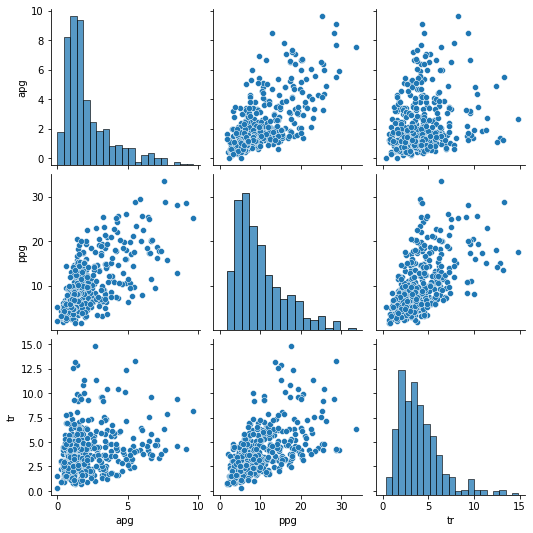

In [ ]:
#pairwise scatter plot
sns.pairplot(nba[['apg', 'ppg','tr']])

# Cluster players based on PPG and APG

In [ ]:
import sklearn.cluster as cluster
pts=nba[['apg','ppg']].dropna(axis=1) #get assists column
kmeans=KMeans(n_clusters=5, random_state=1) #kmeans model with 5 clusters
kmeans.fit(pts) #Train model
labels = kmeans.labels_ #get cluster labels for each player
labels


array([4, 4, 1, 1, 1, 2, 2, 4, 0, 0, 3, 0, 0, 0, 2, 0, 2, 4, 1, 1, 4, 4,
       4, 0, 0, 4, 4, 4, 2, 1, 2, 2, 2, 2, 2, 2, 0, 4, 4, 0, 0, 3, 4, 0,
       0, 1, 1, 4, 0, 0, 2, 4, 1, 0, 2, 4, 1, 2, 0, 4, 4, 4, 0, 2, 1, 4,
       2, 3, 4, 2, 2, 4, 0, 2, 0, 2, 0, 0, 4, 0, 2, 0, 0, 2, 0, 0, 0, 4,
       0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 2, 0, 0, 0, 2, 4, 0, 0, 2, 2, 4,
       0, 2, 0, 3, 4, 4, 0, 2, 0, 0, 4, 2, 4, 0, 1, 4, 3, 4, 4, 4, 4, 0,
       4, 4, 4, 1, 2, 4, 4, 1, 4, 3, 2, 0, 1, 0, 1, 4, 2, 0, 2, 4, 1, 4,
       2, 2, 1, 4, 4, 4, 2, 0, 2, 0, 4, 0, 3, 0, 4, 4, 4, 4, 4, 2, 3, 2,
       0, 0, 2, 2, 4, 0, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 4, 1, 0, 0, 0, 1,
       4, 2, 0, 4, 2, 0, 2, 2, 4, 4, 0, 3, 0, 4, 4, 2, 0, 0, 2, 4, 0, 0,
       4, 4, 0, 4, 0, 4, 0, 4, 4, 0, 0, 0, 2, 1, 2, 0, 2, 2, 4, 4, 4, 0,
       2, 4, 1, 0, 0, 4, 0, 2, 1, 1, 0, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 2, 4, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 4, 4, 4, 1, 2, 0, 4,
       4, 4, 1, 1, 2, 2, 2, 0, 4, 0, 2, 4, 1, 2, 2,

In [ ]:
nba['Clusters']=kmeans.labels_
nba.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,player_id,player_name,ppg,apg,steals,blocks,personal_fouls,seconds_played,fga,fgm,3pa,3pm,fta,ftm,orb,drb,tr,Clusters
0,1629026,kenrich williams,3.3404255319148936,1.4893617021276596,0.72340425531914893617,0.51063829787234042553,2.4255319148936170,1003.6610169491525424,3.5744680851063830,1.2765957446808511,2.2553191489361702,0.59574468085106382979,0.55319148936170212766,0.19148936170212765957,1.2978723404255319,3.5319148936170213,4.8297872340425532,4
3,1629635,sekou doumbouya,5.9047619047619048,0.47619047619047619048,0.47619047619047619048,0.19047619047619047619,1.9523809523809524,1009.6304347826086957,5.8333333333333333,2.2380952380952381,2.4523809523809524,0.69047619047619047619,1.1428571428571429,0.73809523809523809524,0.50000000000000000000,2.4047619047619048,2.90476190476190480000,4
4,202710,jimmy butler,20.1309523809523810,5.9642857142857143,1.7500000000000000,0.59523809523809523810,1.4761904761904762,1817.7578947368421053,12.9880952380952381,6.0833333333333333,2.0000000000000000,0.54761904761904761905,8.8095238095238095,7.4166666666666667,1.8690476190476190,4.5833333333333333,6.4523809523809523,1
5,1629028,deandre ayton,17.3409090909090909,1.8181818181818182,0.65909090909090909091,1.3863636363636364,3.0454545454545455,1260.5230769230769231,14.1363636363636364,7.8409090909090909,0.34090909090909090909,0.11363636363636363636,2.0454545454545455,1.5454545454545455,3.7727272727272727,7.0681818181818182,10.8409090909090909,1
6,203952,andrew wiggins,20.9482758620689655,3.5172413793103448,0.77586206896551724138,0.91379310344827586207,2.3620689655172414,1942.3666666666666667,17.7586206896551724,7.8103448275862069,6.0344827586206897,1.9827586206896552,4.7586206896551724,3.3448275862068966,1.1896551724137931,3.6379310344827586,4.8275862068965517,1


In [ ]:
nba['Clusters'].value_counts()

4    145
0    134
2     88
1     54
3     16
Name: Clusters, dtype: int64

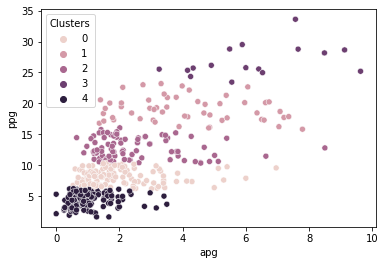

In [ ]:
sns.scatterplot(x='apg', y='ppg', hue='Clusters', data=nba)

### **This Plot has 5 clusters and shows which players are most similar to each other in terms of assists per game and points per game**

In [ ]:
giannis=pts.loc[nba['player_name']=='giannis antetokounmpo',:]
luka =pts.loc[nba['player_name']=='luka doncic',:]
#converting data into lists
giannis_list=giannis.values.tolist()
luka_list=luka.values.tolist()

#classification of lebron and durant
giannis_cluster=kmeans.predict(giannis_list)#Lebron belongs to cluster 3
luka_cluster=kmeans.predict(luka_list)

#print cluster label
print(giannis_cluster)
print(luka_cluster)

[3]
[3]


# Cluster players based on steals and blocks

In [ ]:
defense=nba[['steals','blocks']].dropna(axis=1) #get steals and blocks column
Kmeans=KMeans(n_clusters=5, random_state=1) #kmeans model with 5 clusters
Kmeans.fit(defense) #Train model
Labels = Kmeans.labels_ #get cluster labels for each player
Labels

array([0, 4, 1, 3, 3, 4, 4, 4, 0, 4, 0, 1, 4, 0, 0, 0, 0, 3, 1, 1, 4, 4,
       4, 4, 1, 3, 0, 4, 0, 0, 0, 4, 4, 0, 3, 1, 0, 4, 4, 1, 3, 3, 4, 4,
       0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 3, 4, 1, 0, 4, 4, 4, 4, 1, 0, 2, 4,
       0, 0, 4, 0, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 0, 0, 0, 0, 0, 2, 0, 4,
       0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 0, 0, 0, 4, 4, 0, 4, 4, 0, 4,
       3, 0, 3, 0, 0, 3, 0, 4, 4, 0, 4, 0, 4, 3, 4, 4, 3, 4, 4, 0, 4, 0,
       3, 4, 0, 0, 0, 4, 0, 4, 4, 1, 0, 3, 0, 4, 1, 3, 0, 4, 3, 4, 4, 4,
       0, 0, 2, 4, 3, 4, 0, 1, 2, 4, 4, 4, 0, 1, 4, 4, 0, 3, 4, 2, 1, 3,
       4, 3, 3, 1, 4, 4, 0, 1, 0, 0, 3, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 2,
       0, 0, 4, 3, 3, 4, 3, 2, 4, 0, 0, 1, 3, 3, 3, 0, 4, 0, 0, 4, 3, 0,
       4, 0, 0, 4, 4, 4, 3, 4, 4, 1, 3, 0, 0, 1, 1, 3, 0, 1, 4, 4, 4, 1,
       3, 4, 1, 4, 4, 4, 4, 3, 0, 3, 0, 1, 0, 4, 4, 4, 4, 1, 4, 4, 4, 0,
       0, 4, 4, 4, 0, 0, 4, 1, 4, 3, 0, 0, 0, 1, 0, 4, 4, 3, 0, 1, 4, 4,
       4, 4, 0, 0, 4, 1, 0, 4, 3, 4, 0, 4, 1, 4, 0,

In [ ]:
nba['Clusters']=Kmeans.labels_
nba.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,player_id,player_name,ppg,apg,steals,blocks,personal_fouls,seconds_played,fga,fgm,3pa,3pm,fta,ftm,orb,drb,tr,Clusters
0,1629026,kenrich williams,3.3404255319148936,1.4893617021276596,0.72340425531914893617,0.51063829787234042553,2.4255319148936170,1003.6610169491525424,3.5744680851063830,1.2765957446808511,2.2553191489361702,0.59574468085106382979,0.55319148936170212766,0.19148936170212765957,1.2978723404255319,3.5319148936170213,4.8297872340425532,0
3,1629635,sekou doumbouya,5.9047619047619048,0.47619047619047619048,0.47619047619047619048,0.19047619047619047619,1.9523809523809524,1009.6304347826086957,5.8333333333333333,2.2380952380952381,2.4523809523809524,0.69047619047619047619,1.1428571428571429,0.73809523809523809524,0.50000000000000000000,2.4047619047619048,2.90476190476190480000,4
4,202710,jimmy butler,20.1309523809523810,5.9642857142857143,1.7500000000000000,0.59523809523809523810,1.4761904761904762,1817.7578947368421053,12.9880952380952381,6.0833333333333333,2.0000000000000000,0.54761904761904761905,8.8095238095238095,7.4166666666666667,1.8690476190476190,4.5833333333333333,6.4523809523809523,1
5,1629028,deandre ayton,17.3409090909090909,1.8181818181818182,0.65909090909090909091,1.3863636363636364,3.0454545454545455,1260.5230769230769231,14.1363636363636364,7.8409090909090909,0.34090909090909090909,0.11363636363636363636,2.0454545454545455,1.5454545454545455,3.7727272727272727,7.0681818181818182,10.8409090909090909,3
6,203952,andrew wiggins,20.9482758620689655,3.5172413793103448,0.77586206896551724138,0.91379310344827586207,2.3620689655172414,1942.3666666666666667,17.7586206896551724,7.8103448275862069,6.0344827586206897,1.9827586206896552,4.7586206896551724,3.3448275862068966,1.1896551724137931,3.6379310344827586,4.8275862068965517,3


In [ ]:
nba['Clusters'].value_counts()

4    172
0    141
3     59
1     51
2     14
Name: Clusters, dtype: int64

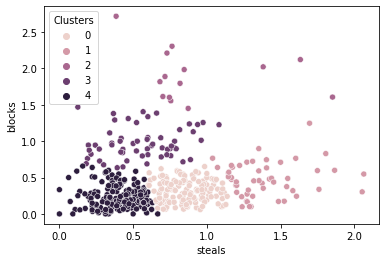

In [ ]:
sns.scatterplot(x='steals', y='blocks', hue='Clusters', data=nba)

### **This Plot has 5 clusters and shows which players are most similar to each other in terms of steals per game and blocks per game**

In [ ]:
og=defense.loc[nba['player_name']=='og anunoby',:]
draymond =defense.loc[nba['player_name']=='draymond green',:]
#converting data into lists
og_list=og.values.tolist()
draymond_list=draymond.values.tolist()

#classification of og and draymond
og_cluster=kmeans.predict(og_list)#og belongs to cluster 0
draymond_cluster=kmeans.predict(draymond_list)

#print cluster label
print(og_cluster)
print(draymond_cluster)

[4]
[4]


# Linear Regression

In [ ]:
#splitting data into 80% teaining and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(nba[['fgm']], nba[['ppg']], test_size=.2, random_state=2)

In [ ]:
#predict the number of ppg per player from the fg made
from sklearn.linear_model import LinearRegression
#create linear regression model
lr=LinearRegression()
lr.fit(X_train, y_train)#training model
predictions=lr.predict(X_test)#make predictions on test data

print(predictions)
print(y_test)

[[ 2.72594749]
 [ 5.07640024]
 [14.57336665]
 [10.08613073]
 [ 9.69498573]
 [ 5.52892718]
 [ 6.75977075]
 [ 9.73011561]
 [ 6.21478399]
 [ 4.62786453]
 [ 2.84381477]
 [ 2.08077923]
 [ 3.67043661]
 [11.60459319]
 [18.39870794]
 [20.58975377]
 [ 6.02143389]
 [ 5.60248172]
 [19.89436202]
 [ 3.02957249]
 [12.13489458]
 [ 3.56261637]
 [10.74971078]
 [11.85490115]
 [21.54597157]
 [ 9.16260707]
 [ 8.47449082]
 [14.16804478]
 [15.12774494]
 [17.41361777]
 [ 6.8444525 ]
 [ 9.16207202]
 [ 7.55797112]
 [ 5.35272587]
 [ 5.06085692]
 [ 5.30248485]
 [ 6.99340928]
 [ 7.01507572]
 [21.87158391]
 [ 7.78537827]
 [11.55278214]
 [16.5425853 ]
 [24.85993355]
 [16.81160424]
 [ 6.43644044]
 [ 5.49487415]
 [10.30997265]
 [15.36495218]
 [11.10450388]
 [ 3.6812928 ]
 [ 9.66167862]
 [11.69936951]
 [13.2440937 ]
 [ 3.57247934]
 [ 7.81813936]
 [ 2.95439963]
 [ 9.72968063]
 [11.0471777 ]
 [ 5.38726657]
 [20.06423433]
 [ 5.87577081]
 [15.81855901]
 [ 4.82770718]
 [13.68073619]
 [ 3.36663542]
 [13.1053272 ]
 [16.92817

In [ ]:
#test model: score returns the coefficient of determination R^2 of the prediction
lr_confidence=lr.score(X_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9714821610494642


### **A very good model**